In [1]:
# This let you see the grapgh without using plt.show()
%matplotlib inline

In [2]:
# This let you keep the grapgh interactice
%matplotlib notebook

In [3]:
# This let you adjust the size of the markers in the legend box (graph 1)
from matplotlib.legend_handler import HandlerPathCollection

In [4]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Load in csv file
city_data_to_load = pd.read_csv("data/city_data.csv")
city_data_to_load.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Load in csv file
ride_data_to_load = pd.read_csv("data/ride_data.csv")
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
# Combine 2 file on City
combined_city_and_ride_data = pd.merge(ride_data_to_load, city_data_to_load, how="left", on="city")
combined_city_and_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# Filter to take only Urban type city
urban_city_and_ride_data = combined_city_and_ride_data.loc[combined_city_and_ride_data["type"]=="Urban",:]
urban_city_and_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# Aggregate the Urban city data and change column name
urban_mean_fare_count_ride = urban_city_and_ride_data.groupby('city').agg({
   'fare': 'mean',
    'type': 'count'})
urban_mean_fare_count_ride = urban_mean_fare_count_ride.rename(columns={"type":"number of rides"})
urban_mean_fare_count_ride.head()

,fare,number of rides
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Carriemouth,28.314444,27
Christopherfurt,24.501852,27
Deanville,25.842632,19


In [10]:
# Add driver_count to data above after calculation
urban_mean_fare_count_ride_driver = pd.merge(urban_mean_fare_count_ride, city_data_to_load, on='city', how='left')
urban_mean_fare_count_ride_driver.head()

,city,fare,number of rides,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Carriemouth,28.314444,27,52,Urban
3,Christopherfurt,24.501852,27,41,Urban
4,Deanville,25.842632,19,49,Urban


In [11]:
# Filter to take only Suburban type city
suburban_city_and_ride_data = combined_city_and_ride_data.loc[combined_city_and_ride_data["type"]=="Suburban",:]
suburban_city_and_ride_data.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [12]:
# Aggregate the Suburban city data and change column name
suburban_mean_fare_count_ride = suburban_city_and_ride_data.groupby('city').agg({
   'fare': 'mean',
    'type': 'count'})
suburban_mean_fare_count_ride = suburban_mean_fare_count_ride.rename(columns={"type":"number of rides"})
suburban_mean_fare_count_ride.head()

,fare,number of rides
city,,
Barronchester,36.422500,16
Bethanyland,32.956111,18
Brandonfort,35.437368,19
Colemanland,30.894545,22
Davidfurt,31.995882,17


In [13]:
# Add driver_count to data above after calculation
suburban_mean_fare_count_ride_driver = pd.merge(suburban_mean_fare_count_ride, city_data_to_load, on='city', how='left')
suburban_mean_fare_count_ride_driver.head()

,city,fare,number of rides,driver_count,type
0,Barronchester,36.422500,16,11,Suburban
1,Bethanyland,32.956111,18,22,Suburban
2,Brandonfort,35.437368,19,10,Suburban
3,Colemanland,30.894545,22,23,Suburban
4,Davidfurt,31.995882,17,23,Suburban


In [14]:
# Filter to take only Rural type city
rural_city_and_ride_data = combined_city_and_ride_data.loc[combined_city_and_ride_data["type"]=="Rural",:]
rural_city_and_ride_data.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


In [15]:
# Aggregate the Suburban city data and change column name
rural_mean_fare_count_ride = rural_city_and_ride_data.groupby('city').agg({
   'fare': 'mean',
    'type': 'count'})
rural_mean_fare_count_ride = rural_mean_fare_count_ride.rename(columns={"type":"number of rides"})
rural_mean_fare_count_ride.head()

,fare,number of rides
city,,
Bradshawfurt,40.064000,10
Garzaport,24.123333,3
Harringtonfort,33.470000,6
Jessicaport,36.013333,6
Lake Jamie,34.358333,6


In [16]:
# Add driver_count to data above after calculation
rural_mean_fare_count_ride_driver = pd.merge(rural_mean_fare_count_ride, city_data_to_load, on='city', how='left')
rural_mean_fare_count_ride_driver.head()

,city,fare,number of rides,driver_count,type
0,Bradshawfurt,40.064000,10,7,Rural
1,Garzaport,24.123333,3,7,Rural
2,Harringtonfort,33.470000,6,4,Rural
3,Jessicaport,36.013333,6,1,Rural
4,Lake Jamie,34.358333,6,4,Rural


<IPython.core.display.Javascript object>


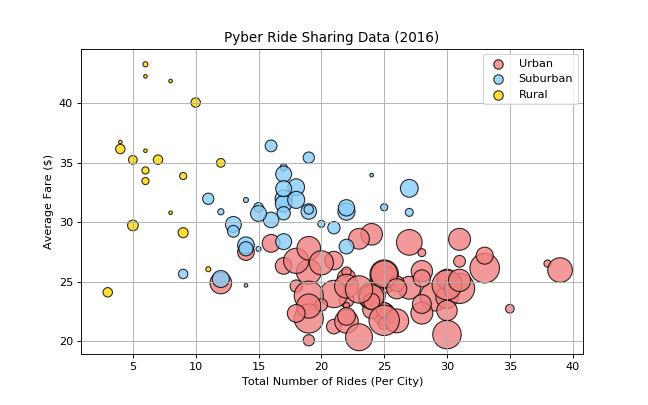

In [17]:
# Adjust size of the chart
# Put data above into one chart
# Turn on grid on the chart
plt.figure(figsize=(8,5))
urban = plt.scatter(urban_mean_fare_count_ride_driver["number of rides"], urban_mean_fare_count_ride_driver["fare"], s=urban_mean_fare_count_ride_driver["driver_count"]*10, marker="o", color="lightcoral", edgecolor="black", label="Urban",alpha=0.80)
suburban = plt.scatter(suburban_mean_fare_count_ride_driver["number of rides"], suburban_mean_fare_count_ride_driver["fare"], s=suburban_mean_fare_count_ride_driver["driver_count"]*10, marker="o", color="lightskyblue", edgecolor="black", label="Suburban",alpha=0.80)
rural = plt.scatter(rural_mean_fare_count_ride_driver["number of rides"], rural_mean_fare_count_ride_driver["fare"], s=rural_mean_fare_count_ride_driver["driver_count"]*10, marker="o", color="gold", edgecolor="black", label="Rural", alpha=0.80)
plt.grid(True)
plt.show()

In [18]:
# Add chart title, xlabel and ylabel
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

Text(54.375, 0.5, 'Average Fare ($)')

In [19]:
# Set location of legend on the chart and title of legend
# markerscale only help change the relatively size of the marker in legend
# this is the only way can find to adjust the size of the marker to be equal, independent from the size of the real scatter plot
plt.legend(loc="upper right", title="City Types")
marker_size = 70
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(handler_map={type(urban): HandlerPathCollection(update_func=update_prop)})

In [20]:
# Groupby without turning the key to index
fare_by_city_type = combined_city_and_ride_data.groupby('type', as_index=False).agg({'fare': 'sum'})
fare_by_city_type

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [21]:
types = fare_by_city_type["type"]
types

0       Rural
1    Suburban
2       Urban
Name: type, dtype: object

In [22]:
fares = fare_by_city_type["fare"]
fares

0     4327.93
1    19356.33
2    39854.38
Name: fare, dtype: float64

In [23]:
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

<IPython.core.display.Javascript object>


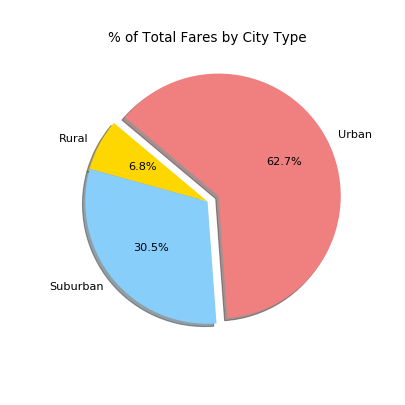

In [24]:
# plt.figure helps seperate this plot from above plot. Otherwise it will create a new layer on the above plot due to interactive feature
plt.figure(figsize=(5,5))
plt.title("% of Total Fares by City Type")
pie_fare_by_city_type = plt.pie(fares, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [25]:
# Groupby without turning the key to index
ride_by_city_type = combined_city_and_ride_data.groupby('type', as_index=False).agg({'ride_id': 'count'})
ride_by_city_type = ride_by_city_type.rename(columns={"ride_id":"number of rides"})
ride_by_city_type

,type,number of rides
0,Rural,125
1,Suburban,625
2,Urban,1625


In [26]:
rides = ride_by_city_type["number of rides"]
rides

0     125
1     625
2    1625
Name: number of rides, dtype: int64

<IPython.core.display.Javascript object>


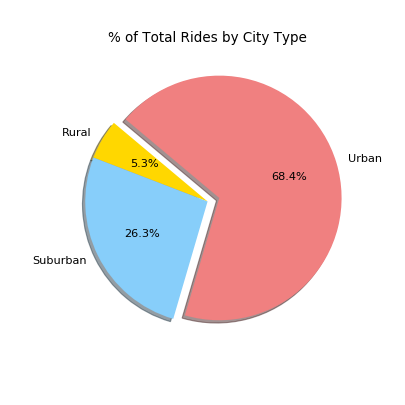

In [27]:
# plt.figure helps seperate this plot from above plot. Otherwise it will create a new layer on the above plot due to interactive feature
plt.figure(figsize=(5,5))
plt.title("% of Total Rides by City Type")
pie_ride_by_city_type = plt.pie(rides, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [28]:
# Groupby without turning the key to index
driver_by_city_type = city_data_to_load.groupby('type', as_index=False).agg({'driver_count': 'sum'})
driver_by_city_type

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


In [29]:
drivers = driver_by_city_type["driver_count"]
drivers

0      78
1     490
2    2405
Name: driver_count, dtype: int64

<IPython.core.display.Javascript object>


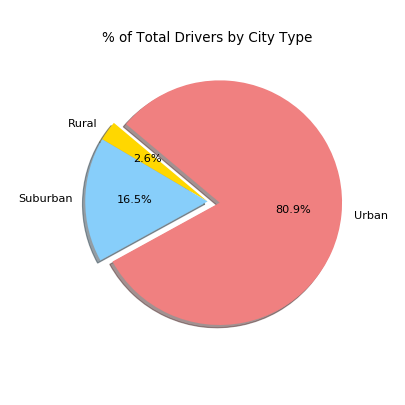

In [30]:
# plt.figure helps seperate this plot from above plot. Otherwise it will create a new layer on the above plot due to interactive feature
plt.figure(figsize=(5,5))
plt.title("% of Total Drivers by City Type")
pie_driver_by_city_type = plt.pie(drivers, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()